# TP02 – SD-TSIA211

### DUARTE DE SÁ Gustavo
### HANNAS DE CARVALHO SANTOS Leonardo

**The report is presented in the python notebook itself. The code is commented when needed in order to explain the different steps of the algorithm. Some executions may take some time to run, be patient.**

---
# Instalation of the necessary packages and imports

In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

2024-02-13 21:18:52.051412: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


---
# Provided code

5


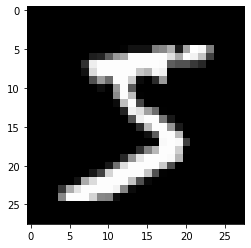

In [3]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]
print(y_train[0])
plt.imshow(train_data[0][0], cmap='gray')

In [4]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#def loss(true, pred):
#    val = 0.
#    for i in range(len(true)):
#        val -= np.log(pred[i, true[i]])
#    return val / len(true)
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


2024-02-13 21:18:58.202743: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# untrained model
logits = model(x_train)
np.argmax(logits, 1)[0:100]

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 9,
       0, 9, 6, 9, 9, 9, 1, 1, 9, 8, 9, 9, 1, 9, 1, 1, 9, 1, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 1, 9, 1, 9, 9, 6, 9, 9, 9, 9, 1, 9, 1, 9,
       1, 9, 9, 1, 9, 9, 9, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 1, 9, 0, 6,
       9, 9, 1, 9, 6, 9, 9, 9, 9, 9, 9, 9])

In [6]:
# what we would like to get
y_train[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [7]:
## Computing a stochastic gradient

# Source: https://keras.io/guides/writing_a_training_loop_from_scratch/

# Example of gradient computation using automatic differentiation

x_train_batch = x_train[:8]
y_train_batch = y_train[:8]
with tf.GradientTape() as tape:
        # Run the forward pass of the layer.
        # The operations that the layer applies
        # to its inputs are going to be recorded
        # on the GradientTape.
        logits = model(x_train_batch)  # Logits for this minibatch

        # Compute the loss value for this minibatch.
        loss_value = loss(y_train_batch, logits)

# Use the gradient tape to automatically retrieve
# the gradients of the trainable variables with respect to the loss.
grad = tape.gradient(loss_value, model.trainable_weights)

## Updating weights

def update_weights(model, update, gamma):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] + gamma * update[i]
    model.set_weights(new_weights)


## Evaluate model
samples_for_evaluation = np.random.randint(0, 10000, 1000)
logits = model(x_train[samples_for_evaluation])
loss(y_train[samples_for_evaluation], logits).numpy()
    

2.365098

---
# 4. Model

## Question 4.1
**How many optimization variables are we going to train using this model?**

The variables of this optimization problem are the weights $\omega_{i,j}^{(k)}$ and the biases $b_{k}$. Considering that the neural network has $4$ layers, we have $3$ layers for the weights and $3$ layers for the biases. Then, we can compute the number of optimization variables as follows:
* First layer: $\omega^{(1)} \in \mathbb{R}^{784 \times 32}$ and $b^{(1)} \in \mathbb{R}^{32}$ $\rightarrow N_{1} = 784 \times 32 + 32 = 25120$ variables.
* Second layer: $\omega^{(2)} \in \mathbb{R}^{32 \times 32}$ and $b^{(2)} \in \mathbb{R}^{32}$ $\rightarrow N_{2} = 32 \times 32 + 32 = 1056$ variables.
* Third layer: $\omega^{(3)} \in \mathbb{R}^{32 \times 10}$ and $b^{(3)} \in \mathbb{R}^{10}$ $\rightarrow N_{3} = 32 \times 10 + 10 = 330$ variables.

Then, the total number of optimization variables is $N = N_{1} + N_{2} + N_{3} = 25120 + 1056 + 330 = 26506$ variables.

---
# 5. Stochastic gradient descent

## Question 5.1
**Reusing the code provided in the basic functions ﬁle, implement stochastic gradient descent for the resolution of the neural network model.**

In [8]:
def stochastic_gradient_descent(model, x_train, y_train, loss, gamma, batch_size, n_epochs, sampling=100):
    
    # Creation of the optimizer
    optimizer = tf.keras.optimizers.SGD(learning_rate=gamma)
    
    # Lists to store the loss values and the iteration numbers
    loss_values = [] 
    
    for epoch in range(n_epochs):
        
        # Shuffle the data
        permutation = np.random.permutation(len(x_train))
        x_train_shuffled = x_train[permutation]
        y_train_shuffled = y_train[permutation]
        
        for i in range(0, len(x_train), batch_size):
            
            # Get the next minibatch of data
            x_train_batch = x_train_shuffled[i:i+batch_size]
            y_train_batch = y_train_shuffled[i:i+batch_size]
        
            # Compute the loss value for this minibatch
            with tf.GradientTape() as tape:
                logits = model(x_train_batch)
                loss_value = loss(y_train_batch, logits)
                loss_values.append(loss_value)
                
            # Compute the gradient of the loss with respect to the model's parameters
            grad = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grad, model.trainable_weights))
            
            # Compute and store the loss every sampling iterations
            if i % sampling == 0:
                loss_values.append(loss_value.numpy())
        
    return loss_values

## Question 5.2

**Run it for one pass over the data (also called one epoch) and with a learning rate that satisﬁes the conditions required by theory.**
**Plot the objective value as a function of the iterations.**

**Hint: Do not compute the objective value at each iteration, only from time to time. This is suﬃcient for plotting purposes and will save computing time.**

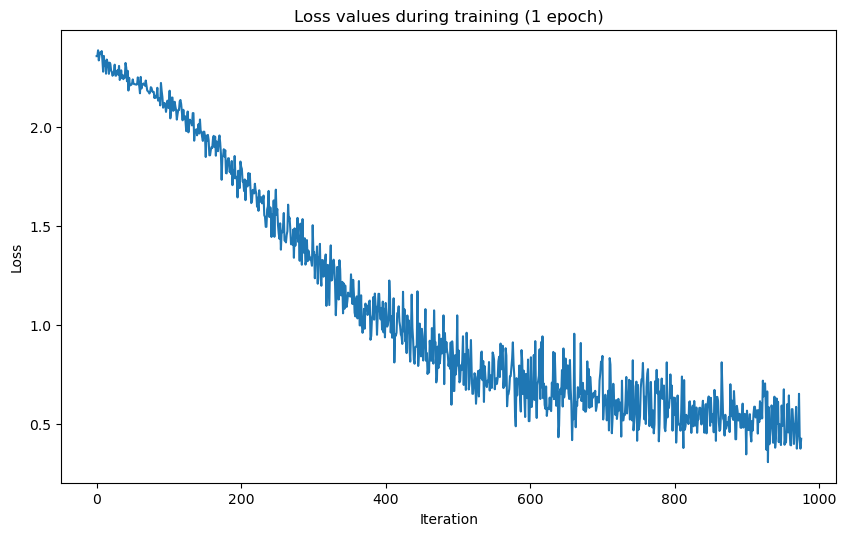

In [9]:
# Parameters
gamma = 0.01
batch_size = 64
n_epochs = 1

# Stochastic Gradient Descent
loss_values = stochastic_gradient_descent(
    model, x_train, y_train, loss, gamma, 
    batch_size, n_epochs)

# Plot of the loss values
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss values during training (1 epoch)')
plt.show()

---
# 6. Empirical risk minimization

**When we want to put more energy on the database we have, we can run the algorithm for more than one epoch. In this case, we consider that we are solving the training problem on a ﬁnite sample and we try to minimize the empirical risk.**

## Question 6.1

**Implement stochastic gradient descent for the resolution of the empirical risk minimization problem and run it for 10 epochs.**

This algortihm is taking around $90 s$ to run for $10$ epochs.

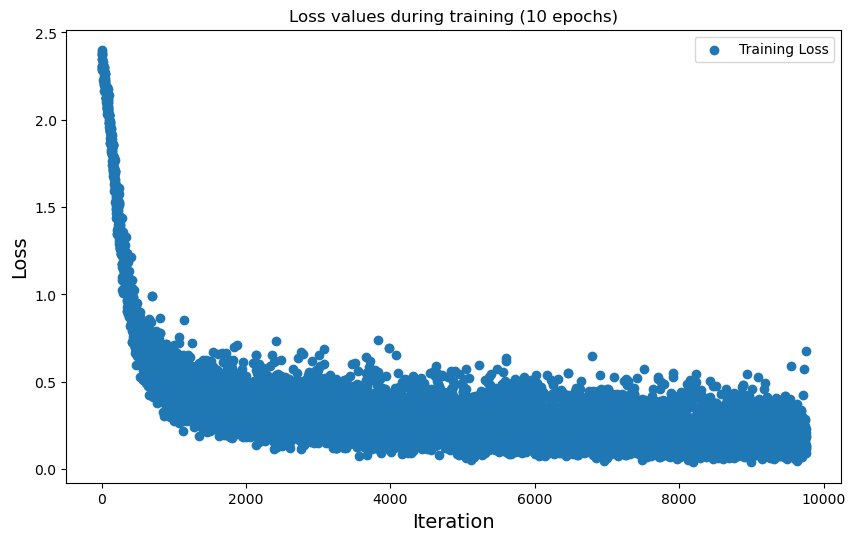

In [10]:
# Rebuilt of the neural network
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Parameters
gamma = 0.01
batch_size = 64
n_epochs = 10

# Stochastic Gradient Descent
loss_values = stochastic_gradient_descent(
    model, x_train, y_train, loss, gamma, 
    batch_size, n_epochs)

# Plot of the loss values
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(range(len(loss_values)), loss_values, label='Training Loss', marker='o')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss values during training (10 epochs)')
plt.legend()
plt.show()

## Question 6.2

**Sometimes practicioners select several samples at each iteration (this is called a batch of samples) and they average them. This results in the algorithm**

* **Select a batch $b_{k+1}$ samples**

* **$x_{k+1} = x_{k} - \gamma_{k} \frac{1}{|b_{k+1}|} \sum_{i \in b_{k+1}} \nabla f(x_{k}, i)$**

**According to you, what is the advantage of such a scheme?**

When you do the processing using the mini-batch strategy, you gain in points like efficiency, smoothing, reduced variance, and generalization performance.

* Efficiency: Mini-batch processing optimizes convergence by utilizing smaller subsets of data. Doing this, you improve the algorithm by enabling parallel processing.

* Smoothing: By incorporating information from multiple samples at each update, mini-batch optimization fosters smoother convergence trajectories, leading to a more predictable outcome and reducing noise.

* Reduced Variance: Averaging gradients over mini-batches stabilizes updates, mitigating the impact of noise inherent in individual samples and ensuring more consistent progress.

* Generalization: The technique enhances the model's ability to generalize by training on diverse mini-batches. This results in improved performance on unseen data and greater robustness in real-world applications.

## Question 6.3
**Add the option of the batch size to your algorithm.**

Method `stochastic_gradient_descent` is already implemented with the option of the batch size in the question 5.1.

---
# 7. Evaluation of the model

## Question 7.1
**Evaluate the accuracy of the model on the training set and on the test set.**

In [11]:
# Evaluate the model's performance on a given dataset
def evaluate(model, inputs, targets):
    sampled_indices = np.random.randint(0, len(inputs), 1000)
    predictions = model(inputs[sampled_indices])
    loss_value = loss(targets[sampled_indices], predictions).numpy()
    accuracy_value = np.mean(np.argmax(predictions, axis=1) == targets[sampled_indices])
    return loss_value, accuracy_value

In [12]:
# Test data
x_test = test_data[0].reshape(-1, 784).astype(float) / 255
y_test = test_data[1]

# Evaluation of the model on train and test sets
eval_train, train_accuracy = evaluate(model, x_train, y_train)
eval_test, test_accuracy = evaluate(model, x_test, y_test)

print(f"Train loss: {eval_train}, Train accuracy: {train_accuracy}")
print(f"Test loss: {eval_test}, Test accuracy: {test_accuracy}")

Train loss: 0.2009107768535614, Train accuracy: 0.949
Test loss: 0.19623327255249023, Test accuracy: 0.937
